In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,
)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

In [12]:
dataiter = iter(trainloader)
images,labels = next(dataiter)

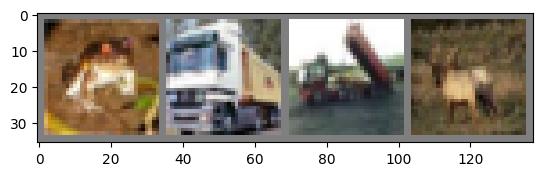

frog truck truck deer


In [13]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}'for j in range(batch_size)))

In [14]:
import torch.nn as nn
import torch.nn.functional as F


In [15]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [17]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [18]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader,0):
    inputs,labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss +=loss.item()
    if i % 2000 == 1999:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.157
[1,  4000] loss: 1.840
[1,  6000] loss: 1.656
[1,  8000] loss: 1.555
[1, 10000] loss: 1.535
[1, 12000] loss: 1.474
[2,  2000] loss: 1.423
[2,  4000] loss: 1.403
[2,  6000] loss: 1.345
[2,  8000] loss: 1.300
[2, 10000] loss: 1.320
[2, 12000] loss: 1.271
Finished Training


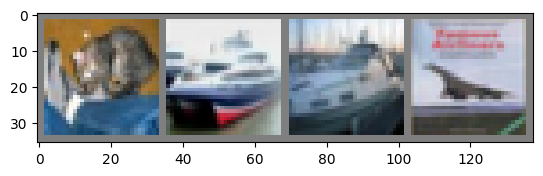

GroundTruth:  cat   ship  ship  plane


In [20]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [21]:
outputs = net(images)
_,predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   plane


In [22]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images,labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 54 %


In [23]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 52.8 %
Accuracy for class: car   is 72.4 %
Accuracy for class: bird  is 33.4 %
Accuracy for class: cat   is 47.7 %
Accuracy for class: deer  is 42.0 %
Accuracy for class: dog   is 35.8 %
Accuracy for class: frog  is 61.2 %
Accuracy for class: horse is 74.3 %
Accuracy for class: ship  is 78.1 %
Accuracy for class: truck is 45.4 %
